In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
user = pd.read_csv('user-9968.csv')
customer = pd.read_excel('customer-9968.xlsx')
course = pd.read_csv('course-9968.csv')
order = pd.read_csv('order-9968.txt', sep=',')
refund = pd.read_csv('refund-9968.csv')

In [3]:
# 날짜형 변수 변환
user['created_at'] = pd.to_datetime(user['created_at'])
user['updated_at'] = pd.to_datetime(user['updated_at'])
user['last_login_at'] = pd.to_datetime(user['last_login_at'])
customer['created_at'] = pd.to_datetime(customer['created_at'])
customer['updated_at'] = pd.to_datetime(customer['updated_at'])
course['created_at'] = pd.to_datetime(course['created_at'])
course['updated_at'] = pd.to_datetime(course['updated_at'])
order['created_at'] = pd.to_datetime(order['created_at'])
order['updated_at'] = pd.to_datetime(order['updated_at'])
refund['created_at'] = pd.to_datetime(refund['created_at'])
refund['updated_at'] = pd.to_datetime(refund['updated_at'])

In [4]:
# user와 customer 테이블에서 유저 수 확인
print('user 테이블에서 id 수', user['id'].nunique())
print('customer 테이블에서 user_id 수', customer['user_id'].nunique())
print('customer 테이블에서 id 수', customer['id'].nunique())

user 테이블에서 id 수 122989
customer 테이블에서 user_id 수 122986
customer 테이블에서 id 수 123013


In [5]:
# user_id 중복행 확인
customer[customer.duplicated(subset=['user_id'], keep=False)].sort_values(by=['user_id', 'created_at'])

,id,type,state,created_at,updated_at,user_id,name,phone,email
119659,34664,USER,NORMAL,2019-10-31 05:32:15,2023-06-16 12:02:14,13852,USER_34664,1012345678,USER_34664@notexistemail.com
117401,55141,USER,NORMAL,2019-12-24 04:46:11,2023-04-26 07:33:56,13852,USER_55141,1012345678,USER_55141@notexistemail.com
122377,6487,USER,NORMAL,2019-08-20 02:24:16,2022-05-25 02:05:21,13853,USER_6487,1012345678,USER_6487@notexistemail.com
119658,34665,USER,NORMAL,2019-10-31 05:35:22,2022-12-09 01:23:48,13853,USER_34665,1012345678,USER_34665@notexistemail.com
119591,35368,USER,HIBERNATED,2019-11-01 23:17:26,2023-12-20 03:00:22,14644,USER_35368,1012345678,USER_35368@notexistemail.com
7,1436523,USER,NORMAL,2023-12-20 01:07:52,2023-12-20 01:07:52,14644,USER_1436523,1012345678,USER_1436523@notexistemail.com
122231,11711,USER,NORMAL,2019-08-23 00:35:39,2022-02-04 01:02:42,16703,USER_11711,1012345678,USER_11711@notexistemail.com
119414,37066,USER,NORMAL,2019-11-05 09:28:13,2023-04-26 07:33:56,16703,USER_37066,1012345678,USER_37066@notexistemail.com
112717,107227,USER,NORMAL,2020-05-08 13:57:13,2023-05-03 14:32:59,92399,USER_107227,1012345678,USER_107227@notexistemail.com
18,1198866,USER,NORMAL,2023-05-03 02:11:40,2023-05-03 02:11:40,92399,USER_1198866,1012345678,USER_1198866@notexistemail.com


customer 테이블에서 user_id가 중복된 행이 있는 것을 확인할 수 있다.   
따라서 둘중 created_at이 최신인 경우만 남기는 것으로 진행하였다. 

In [6]:
# user_id 중복행 삭제
customer = customer.sort_values(by=['id', 'created_at']).drop_duplicates(subset='user_id', keep='last')

In [7]:
course

,id,type,state,created_at,updated_at,title,description,close_at,total_class_hours,keywords
0,214903,COURSE,ONGOING,2022-12-27 01:33:00,2022-12-27 01:33:00,(B2G) K-Di-214903,NaN,NaN,NaN,NaN
1,214898,COURSE,ONGOING,2022-12-26 12:25:00,2022-12-26 12:25:00,(B2G) K-Di-214898,NaN,NaN,NaN,NaN
2,214897,COURSE,ONGOING,2022-12-26 12:20:00,2022-12-26 12:20:00,(B2G) K-Di-214897,NaN,NaN,NaN,NaN
3,214896,COURSE,ONGOING,2022-12-26 12:17:00,2022-12-26 12:17:00,(B2G) K-Di-214896,NaN,NaN,NaN,NaN
4,214895,COURSE,ONGOING,2022-12-26 12:14:00,2022-12-26 12:14:00,(B2G) K-Di-214895,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
717,200260,COURSE,ONGOING,2019-02-20 02:01:00,2023-11-20 01:29:00,스타트업 투자유치&-200260,"베테랑 VC, 패스",NaN,4.0,"스타트업,벤처투자,부동산,금융,금융/ 투자 실무,vc 취업,벤처캐피탈 취업,벤처캐피..."
718,200167,COURSE,HIDDEN,2019-01-31 01:15:00,2023-06-01 01:32:00,1인 쇼핑몰 시작하-200167,상품소싱부터 쇼핑몰,NaN,31.0,"평생소장,쇼핑몰구축,쇼핑몰운영"
719,2600,COURSE,HIDDEN,2018-10-30 21:55:00,2022-11-02 01:45:00,앱/웹 서비스 기획-2600,서비스 기획의 실무,NaN,20.0,"평생소장,전체오픈,서비스기획"
720,2204,COURSE,HIDDEN,2018-07-11 04:24:00,2022-11-02 01:45:00,디자인 툴 올인원 -2204,디자인에 필요한 모,NaN,NaN,"평생소장,디자인,어도비,그래픽,영상,스케치,프로토타이핑"


## **EDA**

### (Order) 2022년 1월 중 가장 매출이 높았던 3일과 낮았던 3일 확인 (status = COMPLETED 기준)

In [8]:
# 월 변수 만들기
order['month'] = order['created_at'].dt.strftime('%Y-%m')
# 일 변수 만들기
order['date'] = order['created_at'].dt.strftime('%Y-%m-%d')

In [9]:
# 월 별 매출액 계산
daily_sales = (order[order['state']=='COMPLETED']).groupby('date')['sale_price'].sum().reset_index()

# 1월 행만 추출
jan_sales = daily_sales[daily_sales['date'].str.startswith('2022-01')]

# 매출액을 기준으로 상위 3개와 하위 3개의 날짜 구하기
top_3_dates = jan_sales.nlargest(3, 'sale_price')['date']
bottom_3_dates = jan_sales.nsmallest(3, 'sale_price')['date']

print("Top 3 Dates:")
print(top_3_dates)
print("\nBottom 3 Dates:")
print(bottom_3_dates)

Top 3 Dates:
8     2022-01-09
4     2022-01-05
30    2022-01-31
Name: date, dtype: object

Bottom 3 Dates:
0     2022-01-01
21    2022-01-22
1     2022-01-02
Name: date, dtype: object


###  (Order) 그리고 그 때의 매출액(list_price)과, 주문 수, 신청자 수, 강의 수 확인

In [10]:
# 2022-01-09의 매출액, 주문 수, 신청자 수, 강의 수 확인
top_sales = order[(order['date']=='2022-01-09') & (order['state']=='COMPLETED')]

# 매출액
total_sales = top_sales['list_price'].sum()

# 주문 수
total_count = top_sales['id'].nunique()

# 신청자 수
total_customer = top_sales['customer_id'].nunique()

# 강의 수
total_course = top_sales['name'].nunique()

print("Total sales on 2022-01-09:")
print(total_sales)
print("\nTotal orders on 2022-01-09:")
print(total_count)
print("\nTotal customers on 2022-01-09:")
print(total_customer)
print("\nTotal courses on 2022-01-09:")
print(total_course)

Total sales on 2022-01-09:
32450000

Total orders on 2022-01-09:
1195

Total customers on 2022-01-09:
1058

Total courses on 2022-01-09:
161


In [11]:
# 2022-01-01의 매출액, 주문 수, 신청자 수, 강의 수 확인
bottom_sales = order[(order['date']=='2022-01-01') & (order['state']=='COMPLETED')]

# 매출액
total_sales = bottom_sales['list_price'].sum()

# 주문 수
total_count = bottom_sales['id'].nunique()

# 신청자 수
total_customer = bottom_sales['customer_id'].nunique()

# 강의 수
total_course = bottom_sales['name'].nunique()

print("Total sales on 2022-01-01:")
print(total_sales)
print("\nTotal orders on 2022-01-01:")
print(total_count)
print("\nTotal customers on 2022-01-01:")
print(total_customer)
print("\nTotal courses on 2022-01-01:")
print(total_course)

Total sales on 2022-01-01:
6260000

Total orders on 2022-01-01:
238

Total customers on 2022-01-01:
223

Total courses on 2022-01-01:
91


### (Order) 월별 각 강의 별 할인율 확인

In [12]:
# 할인율 계산
order['discount_rate'] = (order['discount_price'] / order['list_price']) * 100 
order.groupby(['month', 'name'])['discount_rate'].mean().reset_index()

,month,name,discount_rate
0,2022-01,(B2B) 42SE,0.000000
1,2022-01,(B2B) K-Di,50.000000
2,2022-01,(B2B) 디캠프,0.000000
3,2022-01,(B2B) 비바리퍼,0.000000
4,2022-01,(B2B) 빌리지베,0.000000
...,...,...,...
4491,2022-12,현업 프로젝트로 배,0.000000
4492,2022-12,현직 Advisor,14.285714
4493,2022-12,화사한 색감과 빛의,41.666667
4494,2022-12,확실하게 끝내는 포,45.833333


### (Course) 강의 키워드에서 가장 많이 언급된 단어 확인

In [13]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# 각 단어의 빈도수를 담을 딕셔너리 초기화
word_count = {}

# 각 행의 문자열을 쉼표로 분리하여 단어를 추출하고 빈도수를 계산
for row in course['keywords']:
    if isinstance(row, str):  # 문자열인 경우에만 처리
        words = row.split(',')  # 쉼표를 기준으로 문자열을 분리하여 단어 추출
        for word in words:
            if word in word_count:
                word_count[word] += 1
            else:
                word_count[word] = 1

# 딕셔너리를 빈도가 높은 순으로 정렬
sorted_word_count = sorted(word_count.items(), key=lambda x: x[1], reverse=True)

# 결과 출력
for word, count in sorted_word_count:
    print(f"{word}: {count}")

평생소장: 91
프로그래밍: 67
데이터사이언스: 62
마케팅: 47
디자인: 42
딥러닝: 41
일러스트: 39
포토샵: 39
데이터: 37
숏북: 37
전자책: 37
데이터분석: 36
드로잉: 35
부동산: 35
머신러닝: 29
영상: 29
3D: 26
백엔드: 25
디지털마케팅: 25
프론트엔드: 24
SQL: 24
애프터이펙트: 24
프로젝트: 23
파이썬: 23
금융: 23
더레드: 22
구글애널리틱스: 22
캐릭터: 21
자바: 21
초격차: 21
그림: 20
backend: 20
태블로: 20
광고: 20
구글애즈: 19
인공지능: 18
일러스트레이터: 18
웹개발: 17
네카라쿠배: 17
디자인툴: 17
프리미어: 17
인스타그램: 16
취미: 16
자바스크립트: 15
UX: 15
GA: 15
실습: 15
데브옵스: 15
커리어: 15
GA4: 15
모션그래픽: 15
데이터스튜디오: 15
GAIQ: 15
수콩: 15
곽수빈: 15
올인원: 15
업무 생산성: 15
입문: 14
스프링: 14
글쓰기: 14
콘텐츠: 14
Top-tier: 14
아이패드: 14
모델링: 14
투자: 14
시장조사: 14
캐주얼: 13
리액트: 13
모바일앱: 13
알고리즘: 13
페이스북: 13
실리콘밸리: 13
포트폴리오: 12
UI: 12
모바일: 12
안드로이드: 12
컴퓨터비전: 12
검색광고: 12
레드: 12
게임: 11
HTML: 11
프론트엔드심화: 11
퍼포먼스마케팅: 11
데이터엔지니어링: 11
리팩토링: 11
앱개발: 11
스토리텔링: 11
클립스튜디오: 11
데이터 사이언스: 11
태그매니저: 11
보고서: 11
엑셀: 11
재테크: 11
개발자 커리어: 11
도커: 10
스프링부트: 10
클라우드: 10
DevOps: 10
frontend: 10
백엔드심화: 10
타입스크립트: 10
UXUI: 10
회계: 10
자율주행: 10
java: 10
직장인: 10
부업: 10
네오아카데미: 9
클론코딩: 9
React: 9
자연어처리: 9
서버: 9


평생소장이라는 단어가 가장 많이 확인되었다. 패스트캠퍼스는 강의 평생소장을 내세워 마케팅을 진행하는 것으로 추측해볼수 있다.   
다음으로는 프로그래밍, 데이터사이언스 순으로 확인되었는데 주로 개발, 데이터 위주의 강의를 서비스하는 것을 확인할 수 있다.

### (Refund) 환불이 가장 많은 강의 확인

In [15]:
# refund와 course를 조인
refund_course = pd.merge(refund, course, left_on='course_id', right_on='id')

# title별 빈도 확인
refund_count = (refund_course['title'].value_counts()).reset_index()

refund_count.head(10)

,title,count
0,10개 프로젝트로 -211368,269
1,한 번에 끝내는 J-203525,224
2,한 번에 끝내는 프-203720,205
3,일잘러 필수 스킬 -204373,187
4,네오아카데미 : 완-212600,182
5,스프링의 정석 : -207343,175
6,블렌더로 만드는 동-207513,171
7,한 번에 끝내는 데-209597,152
8,30개 프로젝트로 -208856,137
9,Kubernetes-208963,136


환불이 가장 많은 강의는 '10개 프로젝트로 -211368'였고, '한 번에 끝내는 J-203525', '	한 번에 끝내는 프-203720' 순으로 확인되었다.

### (Customer) 강의를 가장 많이 신청한 고객과 그 금액 확인

In [16]:
# customer와 order 조인
customer_order = pd.merge(customer, order, left_on='id', right_on='customer_id')

# 강의를 가장 많이 신청한 고객
print(((customer_order['customer_id'].value_counts()).reset_index()).iloc[0])

# 고객별 강의 총 금액(list_price)
customer_list_price = (customer_order.groupby('customer_id')['list_price'].sum()).reset_index()

# 고객별 강의 총 실제 구매금액(sale_price)
customer_sale_price = (customer_order.groupby('customer_id')['sale_price'].sum()).reset_index()

print('\nTotal list price of id: 793517')
print(customer_list_price.loc[customer_list_price['customer_id']==793517, 'list_price'])
print('\nTotal sale price of id: 793517')
print(customer_sale_price.loc[customer_list_price['customer_id']==793517, 'sale_price'])

customer_id    793517
count             338
Name: 0, dtype: int64

Total list price of id: 793517
44542    8650000
Name: list_price, dtype: int64

Total sale price of id: 793517
44542    590000
Name: sale_price, dtype: int64


In [17]:
# customer_id = 793517 확인
order.loc[order['customer_id']==793517]

,id,type,state,name,created_at,updated_at,customer_id,list_price,sale_price,discount_price,tax_free_price,month,date,discount_rate
3288,1593619,ORDER,COMPLETED,입문자를 위한 딥러,2022-12-30 07:23:21,2022-12-30 07:23:24,793517,40000,0,40000,0,2022-12,2022-12-30,100.0
3600,1592676,ORDER,COMPLETED,한 번에 끝내는 A,2022-12-30 04:22:17,2022-12-30 04:22:19,793517,20000,0,20000,0,2022-12,2022-12-30,100.0
3740,1592215,ORDER,COMPLETED,논리적인 디자인을,2022-12-30 02:13:41,2022-12-30 02:13:43,793517,30000,0,30000,0,2022-12,2022-12-30,100.0
5132,1588825,ORDER,COMPLETED,Solana&Rus,2022-12-29 07:35:42,2022-12-29 07:35:44,793517,20000,0,20000,0,2022-12,2022-12-29,100.0
9495,1577197,ORDER,COMPLETED,차원이 다른 캐주얼,2022-12-26 08:10:50,2022-12-26 08:10:52,793517,20000,0,20000,0,2022-12,2022-12-26,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246765,869909,ORDER,COMPLETED,구글 Materia,2022-02-07 08:26:55,2022-02-07 08:26:56,793517,30000,0,30000,0,2022-02,2022-02-07,100.0
250325,862981,ORDER,COMPLETED,초격차 패키지 :,2022-02-04 09:25:32,2022-02-04 09:25:33,793517,20000,0,20000,0,2022-02,2022-02-04,100.0
250326,862980,ORDER,COMPLETED,유니티 게임 포트폴,2022-02-04 09:24:52,2022-02-04 09:24:52,793517,30000,0,30000,0,2022-02,2022-02-04,100.0
251033,858964,ORDER,COMPLETED,히어로부터 크리쳐까,2022-02-03 09:10:11,2022-02-03 09:10:12,793517,30000,0,30000,0,2022-02,2022-02-03,100.0


가장 많은 강의를 신청한 고객의 customer_id는 793517로 총 338개의 강의를 신청했다.   
해당 고객이 구매한 강의의 총 원가는 8,650,000원이었으나 실제로 구매한 가격은 590,000원이었다.   
거의 무료로 구매한 강의가 많았는데 해당 자료를 확인해볼 필요가 있다.

### (Order) 주말과 주중의 평균 강의 신청율 차이 확인

In [18]:
# 요일을 숫자로 추출 (0: 월요일 ~ 6: 일요일)
order['weekday'] = order['created_at'].dt.weekday

# 요일을 문자열로 추출
order['weekday'] = order['created_at'].dt.strftime('%A')

# 주중, 주말 변수를 나타내는 열 생성
order['weekend'] = order['weekday'].isin(['Saturday', 'Sunday'])

# 주말과 주중 강의 신청 비율 확인
order['weekend'].value_counts(normalize=True)

weekend
False    0.742782
True     0.257218
Name: proportion, dtype: float64

In [19]:
# 요일별 강의 신청 비율 확인
order['weekday'].value_counts(normalize=True)

weekday
Monday       0.174401
Sunday       0.157790
Wednesday    0.148387
Friday       0.147123
Thursday     0.137349
Tuesday      0.135522
Saturday     0.099428
Name: proportion, dtype: float64

주말 강의 신청 비율은 약 25%로 주중과 크게 차이를 보이지는 않았다.(주말은 토, 일요일 이틀이므로)   
요일별로 확인했을때는 월요일, 일요일 순으로 많은 강의 신청 비율을 보였다.

### (User) 주로 몇시에 회원 가입(created_at)이 활발했는지? 월별로 차이가 있는지 보여주고, 그 근거를 추론해 보세요

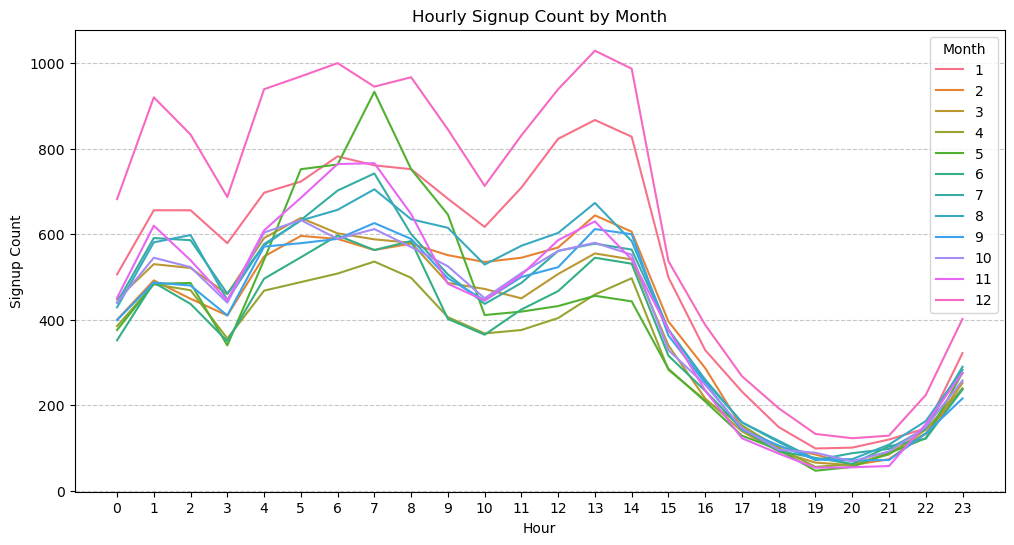

In [20]:
# 가입 월, 시간 변수 생성
user['created_month'] = user['created_at'].dt.month
user['created_hour'] = user['created_at'].dt.hour

# 월별 시간대별 회원 가입 횟수 집계
hourly_signup_count = user.groupby(['created_month', 'created_hour']).size().unstack()


# 시각화
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_signup_count.T, dashes=False)
plt.title('Hourly Signup Count by Month')
plt.xlabel('Hour')
plt.ylabel('Signup Count')
plt.xticks(range(24))
plt.legend(title='Month')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

주로 오전시간대에 가입이 활발한 것으로 확인되었다.   
또한 월별로 대체로 비슷한 형태를 보였다.

### (Order) 강의 가격(list_price) 분포 확인

In [21]:
# list_price의 최대값 구하기
max_price = order['list_price'].max()

# 가격을 5만원 단위의 구간으로 나누기
bins = range(0, max_price + 50000, 50000)
order['price_bin'] = pd.cut(order['list_price'], bins=bins, right=False)

# 각 구간에 속하는 데이터 개수 세기
frequency_table = order['price_bin'].value_counts().sort_index()

# 도수분포표 생성
frequency_df = pd.DataFrame({'Price Bin': frequency_table.index, 'Frequency': frequency_table.values})
frequency_df

,Price Bin,Frequency
0,"[0, 50000)",267266
1,"[50000, 100000)",12565
2,"[100000, 150000)",3656
3,"[150000, 200000)",73
4,"[200000, 250000)",172
...,...,...
129,"[6450000, 6500000)",0
130,"[6500000, 6550000)",0
131,"[6550000, 6600000)",0
132,"[6600000, 6650000)",0


주로 5만원 아래의 강의가 판매된 것을 확인할 수 있었다. 또한 상대적으로 고가의 강의는 수요가 적은 것을 알 수 있었다.

### (Order) 월별로 신청이 완료된 강의(complated)와 진행중인 강의(pending), 그리고 취소된 강의(cancelled) 간의 금액(list_price)과 유저의 비중 확인

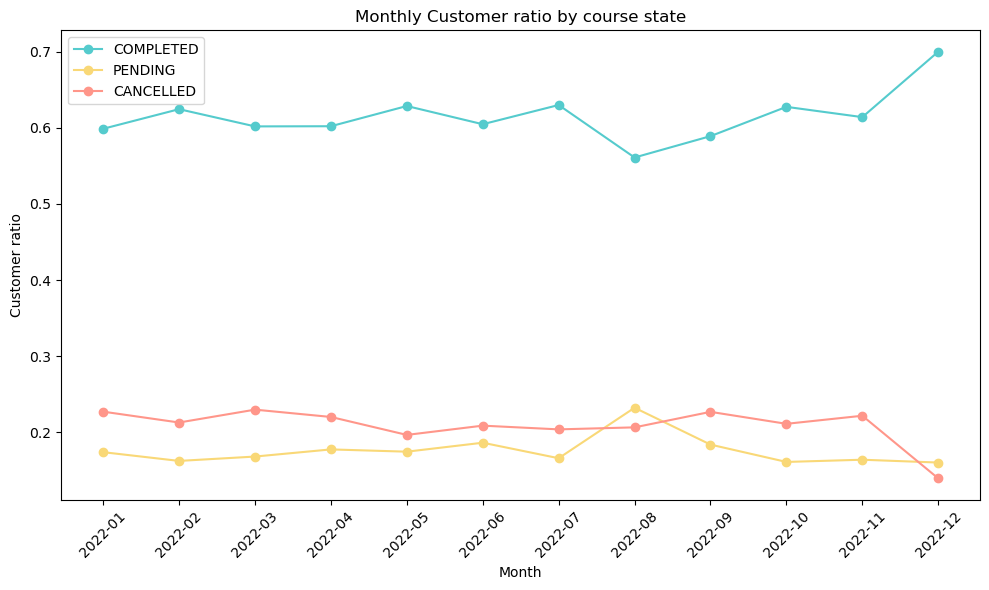

In [22]:
# 각 상태별로 그룹화하여 월별 금액의 합계와 유저의 비중 계산
grouped = order.groupby(['month', 'state']).agg({'list_price': 'sum', 'id': 'count'}).reset_index()
grouped.columns = ['month', 'state', 'total_price', 'user_count']
total_users = grouped.groupby('month')['user_count'].sum()

# 각 상태별 비중 계산
grouped['user_ratio'] = grouped.apply(lambda x: x['user_count'] / total_users[x['month']], axis=1)

# 고객 비율 시각화
fig, ax = plt.subplots(figsize=(10, 6))

for state, color in zip(['COMPLETED', 'PENDING', 'CANCELLED'], ['#55CBCD', '#F9D877', '#FF968A']):
    status_data = grouped[grouped['state'] == state]
    ax.plot(status_data['month'], status_data['user_ratio'], label=state, color=color, marker='o')

ax.set_title('Monthly Customer ratio by course state')
ax.set_xlabel('Month')
ax.set_ylabel('Customer ratio')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

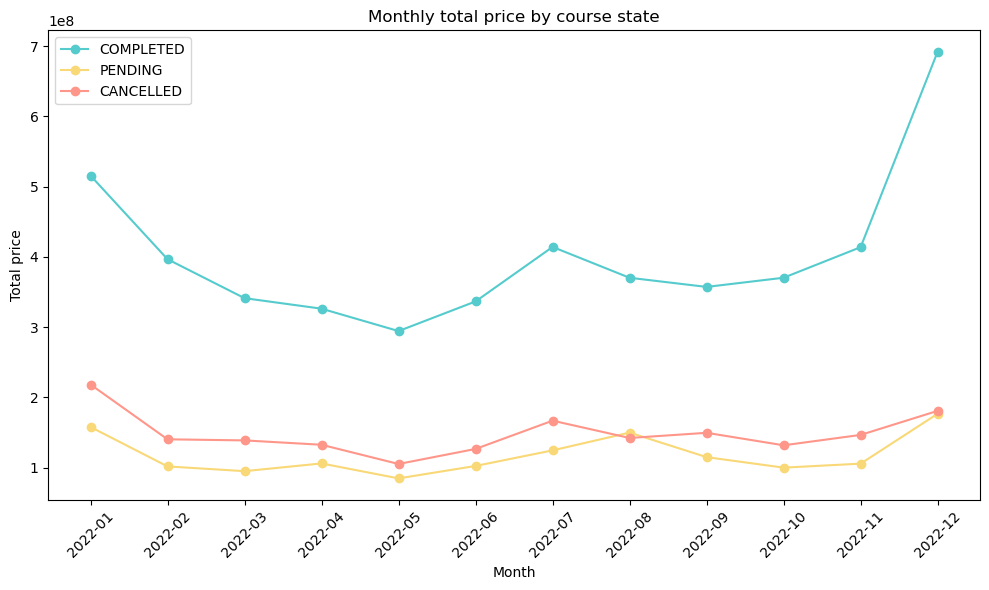

In [23]:
# 강의 금액 시각화
fig, ax = plt.subplots(figsize=(10, 6))

for state, color in zip(['COMPLETED', 'PENDING', 'CANCELLED'], ['#55CBCD', '#F9D877', '#FF968A']):
    status_data = grouped[grouped['state'] == state]
    ax.plot(status_data['month'], status_data['total_price'], label=state, color=color, marker='o')

ax.set_title('Monthly total price by course state')
ax.set_xlabel('Month')
ax.set_ylabel('Total price')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8월에 유독 강의 취소 비율이 높은 것을 확인할 수 있었다. 이를통해 8월에 취소된 강의들을 확인해볼 필요가 있다. 또한 12월의 강의 신청 완료 비율 및 판매액이 눈에 띄게 높았는데 당시에 진행했던 프로모션이나 판매된 강의를 확인해보면 향후 프로모션 진행 방향에 도움이 될 것으로 판단된다.

### (User) state이 HIBERNATED 된 Used들은 ID를 생성(created_at)하고 마지막 로그인(last_login_at)까지 평균적으로 몇일이 걸렸나요?

In [24]:
# ID 생성 후, 마지막 로그인까지 날짜 계산
user['days_from_create'] = (user['last_login_at'] - user['created_at']).dt.days

# state별 ID 생성 후, 마지막 로그인까지의 평균 날짜 계산
user.groupby('state')['days_from_create'].mean().reset_index()

,state,days_from_create
0,DELETED,170.442402
1,HIBERNATED,154.114382
2,NORMAL,628.447518
3,WITHDRAWN,464.111111
4,ZOMBIE,341.666667


HIBERNATED된 User들은 ID 생성 후, 마지막 로그인까지의 기간은 평균 154일로 확인되었다.    
예상했던 것처럼 다른 state에 비해 계정 생성 후, 마지막 로그인까지의 날짜가 짧았다.

## **Trend Analysis**

## 1. (Customer) 월별 가입자 수

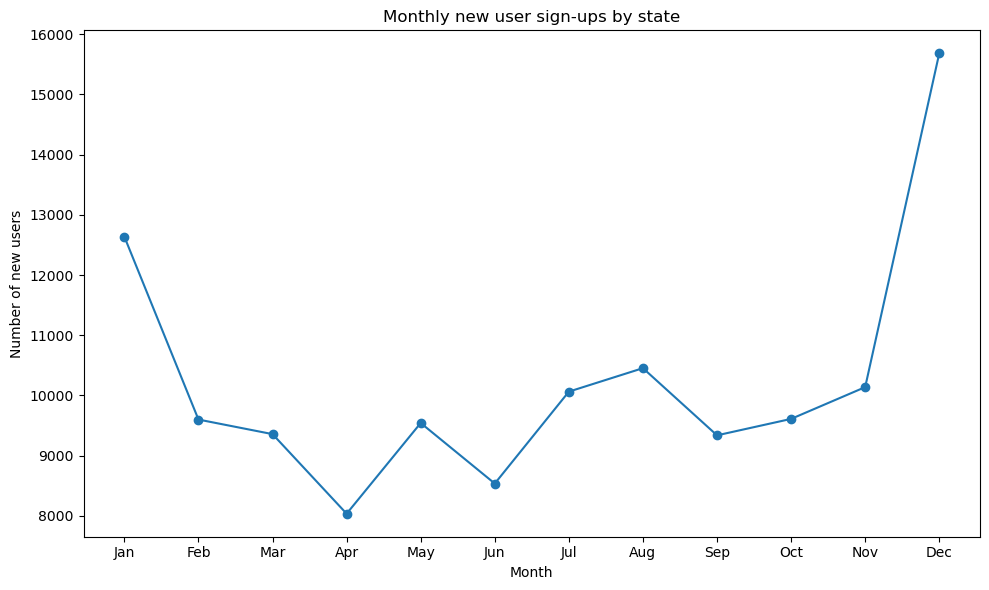

In [25]:
# 월별 가입자 수 계산
monthly_users = user.groupby('created_month').size()

# 라인 그래프로 시각화
plt.figure(figsize=(10, 6))
monthly_users.plot(marker='o', linestyle='-')
plt.title('Monthly new user sign-ups by state')
plt.xlabel('Month')
plt.ylabel('Number of new users')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## 2. (course) 월별 강의 state 수

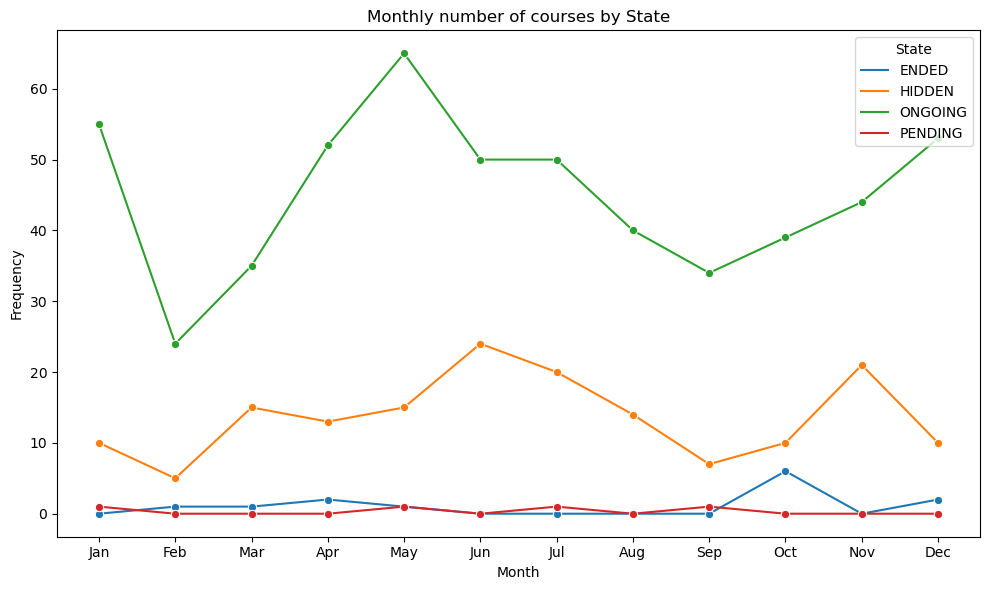

In [26]:
# state 및 월별 가입자 수 계산
monthly_course = course.groupby([course['created_at'].dt.month, 'state']).size().unstack(fill_value=0)

# 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_course, marker='o', dashes=False)
plt.title('Monthly number of courses by State')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='State', loc='upper right')
plt.tight_layout()
plt.show()

## 3. (Order) 월별 총 강의 판매액, 할인액, 수익

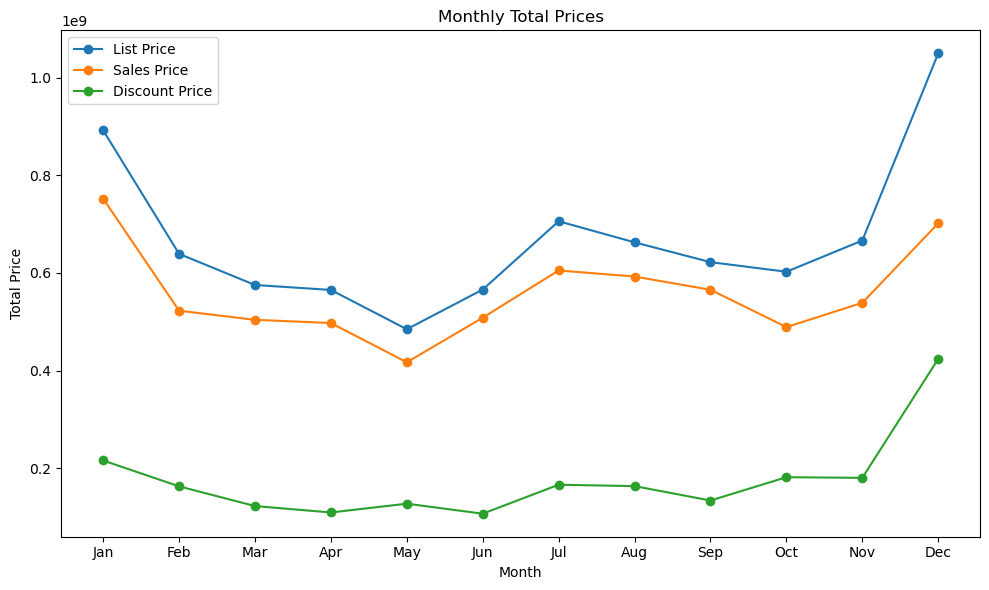

In [27]:
# 월별 총 list_price, sales_price, discount_price 계산
monthly_total_prices = order.groupby('month')[['list_price', 'discount_price', 'sale_price']].sum()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# 각 변수에 대한 라인 그래프 플로팅
plt.plot(monthly_total_prices.index, monthly_total_prices['list_price'], label='List Price', marker='o')
plt.plot(monthly_total_prices.index, monthly_total_prices['sale_price'], label='Sales Price', marker='o')
plt.plot(monthly_total_prices.index, monthly_total_prices['discount_price'], label='Discount Price', marker='o')

plt.title('Monthly Total Prices')
plt.xlabel('Month')
plt.ylabel('Total Price')
plt.legend()
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

## 4. (Refund) 월별 환불 금액, 환불 강의 수

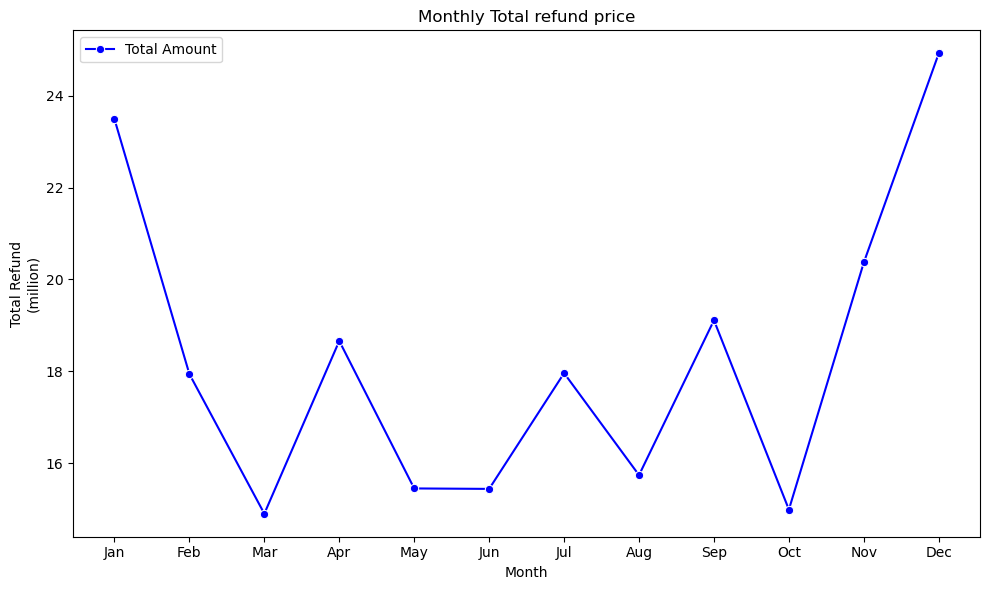

In [34]:
# 월별 amount 총합과 id 수 계산
monthly_total_amount = refund.groupby(refund['created_at'].dt.to_period('M'))['amount'].sum().reset_index()
monthly_total_amount['amount'] = (monthly_total_amount['amount'] * -1) / 1e6
monthly_id_count = refund.groupby(refund['created_at'].dt.to_period('M'))['id'].count().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))

# amount 총합 라인 그래프 플로팅
sns.lineplot(data=monthly_total_amount['amount'], marker='o', color='b', label='Total Amount')

plt.title('Monthly Total refund price')
plt.xlabel('Month')
plt.ylabel('Total Refund\n(million)')
plt.legend()
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()